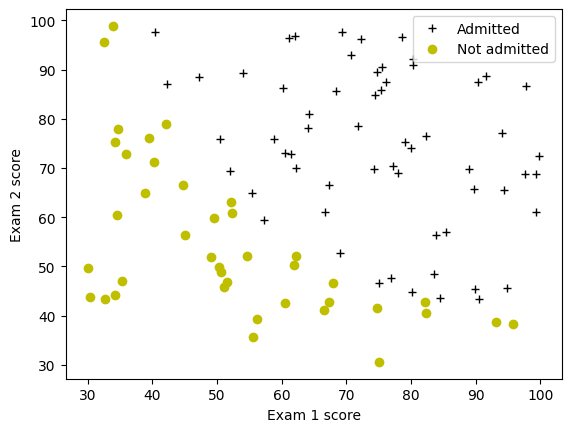

Output of predict: shape (4,), value [0. 1. 1. 1.]
All tests passed!
Train Accuracy: 92.000000
Iteration    0: Cost     0.96   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   


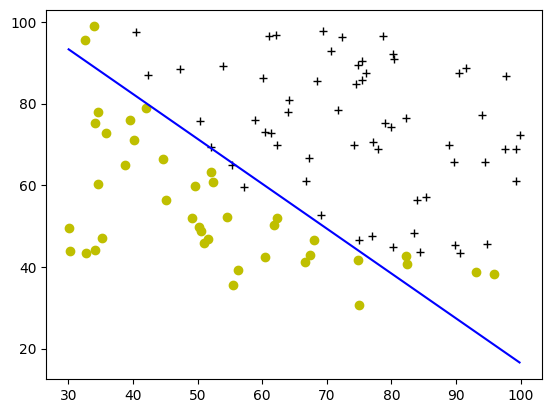

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math

%matplotlib inline

# Load dataset
X_train, y_train = load_data('data/ex2data1.txt')

# plot examples
plot_data(X_train, y_train[:], pos_label='Admitted', neg_label='Not admitted')

# set the y-axis label
plt.ylabel('Exam 2 score')
# set x-axis label
plt.xlabel('Exam 1 score')
plt.legend(loc= 'upper right')
plt.show()

def sigmoid(z):
     """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
     g = 1 / (1 + np.exp(-z))

     return g

#numpy has a function called np.exp(), which offers a convinient way to calculate the exponential ( ) of all elements in the input array (z).
def compute_cost(X, y, w, b,lambda_=1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : scalar Values of bias parameter of the model
      lambda_: unused placeholder
    Returns:
      total_cost: (scalar)         cost 
    """
     
    m,n = X.shape

    cost = 0
    for i in range(m):
          z = np.dot(X[i], w) + b
          f_wb = sigmoid(z)
          cost += -y[i]*np.log(f_wb) -(1 - y[i])*np.log(1 - f_wb)
    total_cost = cost/m
    return total_cost
          
def compute_gradient(X,y,w,b,lambda_=None):
    m,n = X.shape

    dj_dw  = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w)+b)
        err_i = f_wb_i - y[i]
        for j in range(n):
             dj_dw[j] = dj_dw[j] + err_i * X[i,j] 
        dj_db = dj_db + err_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

def predict(X, w, b):
    m,n = X.shape
    p = np.zeros(m)

    for i in range(m):   
        z_wb = np.dot(X[i],w) 
        for j in range(n): 
            z_wb += 0
        z_wb += b
        f_wb = sigmoid(z_wb)
        p[i] = 1 if f_wb>0.5 else 0
    return p
# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

# UNIT TESTS   
from public_tests import *     
predict_test(predict)

#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))
        
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)  # Shape (2,)
initial_w = initial_w.reshape(-1)  # Garante vetor 1D
initial_b = -8


# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)
plot_decision_boundary(w, b, X_train, y_train)

# load dataset
X_train, y_train = load_data("data/ex2data2.txt")

# Plot examples
plot_data(X_train, y_train[:], pos_label="Accepted", neg_label="Rejected")

# Set the y-axis label
plt.ylabel('Microchip Test 2') 
# Set the x-axis label
plt.xlabel('Microchip Test 1') 
plt.legend(loc="upper right")
plt.show()

# the figure show that the data cannot be separated through a straigth line, positive and negative.
# One way to fit the data better is to create more features from each data point. In the provided
# function map_feature, we will map the features into all polynomial terms of x1 and x2 up to the sixth power
# as a result of this mapping, our vector of two features has been transformed into a 27-dimensional vector
# A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will be nonlinear when drawn in our 2-dimensional plot.

print("Original shape of data:", X_train.shape)

mapped_X = map_feature(X_train[:,0], X_train[:,1])
print('Shape after feature mapping:', mapped_X.shape)
print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", mapped_X[0])

# even though the feature mapping allows us to build a more expressive classifier, its more susceptible
# to overfitting, we will implement regularized logistic regression to fit the data, and see how it can help avoid overfitting

def compute_cost_reg(X, y, w, b, lambda_=1):
    m,n = X.shape

    cost_without_reg = compute_cost(X, y, w, b)
    reg_cost = 0
    reg_cost = sum(np.square(w))
    total_cost = cost_without_reg + (lambda_/(2*m))*reg_cost
    return total_cost
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)

# UNIT TEST    
compute_cost_reg_test(compute_cost_reg)

def compute_gradient_reg(X,y,w,b,lambda_=1):

    m,n = X.shape
    dj_db, dj_dw = compute_gradient()

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m)* w[j]
    return dj_db, dj_dw
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )

# UNIT TESTS    
compute_gradient_reg_test(compute_gradient_reg)

# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ to 1 (you can try varying this)
lambda_ = 0.01;                                          
# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)
plot_decision_boundary(w, b, X_mapped, y_train)
#Compute accuracy on the training set
p = predict(X_mapped, w, b)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

